In [2]:
N = ord("C") % 3 + 1
print(N)


2


In [8]:
import csv
import numpy as np

def read_and_extract_column(filename, column_name, dtype=float):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        header = next(reader)  # Skip the first row
        col_index = header.index(column_name)
        column_data = np.array([dtype(row[col_index]) for row in reader if row[col_index]])  # Convert to the specified dtype
    return column_data

filename = 'russia_losses_equipment.csv'
tank_data = read_and_extract_column(filename, 'tank', dtype=int)  

print(tank_data)

[8768 8746 8725 8705 8691 8685 8683 8680 8674 8671 8653 8642 8640 8639
 8636 8632 8631 8624 8618 8611 8601 8592 8582 8574 8571 8568 8563 8551
 8547 8542 8533 8529 8522 8518 8513 8508 8501 8496 8484 8476 8455 8450
 8447 8441 8434 8431 8429 8421 8417 8411 8406 8402 8399 8390 8381 8356
 8344 8331 8320 8313 8302 8288 8284 8266 8257 8250 8245 8238 8227 8214
 8206 8199 8191 8182 8180 8178 8171 8155 8153 8142 8132 8123 8107 8099
 8080 8073 8066 8042 8039 8035 8031 8019 8009 8001 7987 7984 7974 7958
 7956 7956 7936 7928 7911 7902 7879 7869 7843 7834 7828 7806 7794 7779
 7765 7740 7728 7710 7700 7692 7671 7662 7650 7635 7622 7611 7605 7590
 7576 7560 7547 7529 7510 7496 7485 7454 7449 7434 7429 7418 7405 7380
 7375 7366 7354 7332 7312 7307 7285 7279 7268 7262 7255 7242 7241 7236
 7229 7213 7205 7196 7193 7189 7180 7174 7169 7146 7137 7132 7110 7087
 7074 7057 7033 7018 7009 6998 6986 6966 6951 6922 6914 6904 6893 6887
 6876 6852 6840 6832 6828 6819 6809 6790 6779 6758 6757 6752 6747 6739
 6731 

In [9]:
daily_losses = np.diff(tank_data)
print(daily_losses)

[-22 -21 -20 -14  -6  -2  -3  -6  -3 -18 -11  -2  -1  -3  -4  -1  -7  -6
  -7 -10  -9 -10  -8  -3  -3  -5 -12  -4  -5  -9  -4  -7  -4  -5  -5  -7
  -5 -12  -8 -21  -5  -3  -6  -7  -3  -2  -8  -4  -6  -5  -4  -3  -9  -9
 -25 -12 -13 -11  -7 -11 -14  -4 -18  -9  -7  -5  -7 -11 -13  -8  -7  -8
  -9  -2  -2  -7 -16  -2 -11 -10  -9 -16  -8 -19  -7  -7 -24  -3  -4  -4
 -12 -10  -8 -14  -3 -10 -16  -2   0 -20  -8 -17  -9 -23 -10 -26  -9  -6
 -22 -12 -15 -14 -25 -12 -18 -10  -8 -21  -9 -12 -15 -13 -11  -6 -15 -14
 -16 -13 -18 -19 -14 -11 -31  -5 -15  -5 -11 -13 -25  -5  -9 -12 -22 -20
  -5 -22  -6 -11  -6  -7 -13  -1  -5  -7 -16  -8  -9  -3  -4  -9  -6  -5
 -23  -9  -5 -22 -23 -13 -17 -24 -15  -9 -11 -12 -20 -15 -29  -8 -10 -11
  -6 -11 -24 -12  -8  -4  -9 -10 -19 -11 -21  -1  -5  -5  -8  -8 -19  -6
 -11 -17 -21  -9  -8 -16 -14 -17 -23 -14  -1 -13  -8  -8  -3  -7 -13  -5
 -11 -11 -11 -23  -9  -9  -8 -10 -12  -9  -2 -11  -7 -17  -5  -2 -10  -9
 -12 -10 -10 -10  -9  -6  -8 -30 -13 -22 -11 -10  -

In [89]:
four_greatest_losses = np.sort(daily_losses)[:4]
print(four_greatest_losses)

[-66 -55 -48 -44]


In [64]:
import csv
import numpy as np
from datetime import datetime

def read_csv_column(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  
        column_index = headers.index(column_name)
        column_data = [row[column_index] for row in reader if row[column_index]]  

        if column_name == 'date':
            return np.array(column_data) 
        else:
            return np.array(column_data, dtype=float)  


filename = 'russia_losses_equipment.csv'
date_data = read_csv_column(filename, 'date')  
tank_data = read_csv_column(filename, 'tank')  


dates_as_dt = np.array([datetime.strptime(date, '%Y-%m-%d') for date in date_data])

first_day_of_spring = datetime(2024, 3, 1)
last_day_of_spring = datetime(2024, 5, 31)


difference = tank_losses_last_day.sum() - tank_losses_first_day.sum()

print(f"Tanks destroyed in the spring of 2024: {int(difference)}")

Tanks destroyed in the spring of 2024: 1118


In [62]:
mean_last_100_days = np.sum(daily_losses[:100])
print(f"Mean value of destroyed tanks in the last 100 days of war: {int(abs(mean_last_100_days))}")

Mean value of destroyed tanks in the last 100 days of war: 832


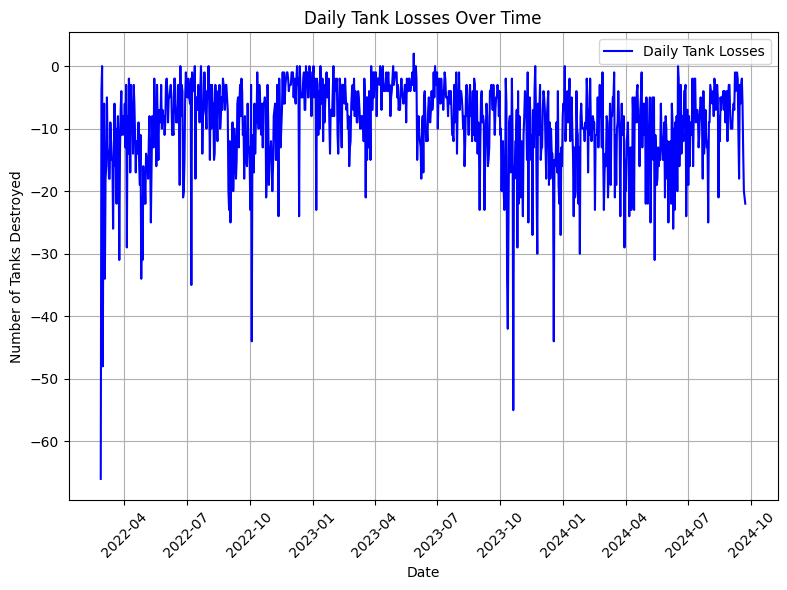

In [92]:
import matplotlib.pyplot as plt
def plot_tank_losses(daily_losses, date_data):
    # Select last 365 days data 
    losses_last_year = daily_losses[-365:]
    dates_last_year = date_data[-365:]

# Plot the data
    plt.figure(figsize=(8, 6), dpi=100)  # Reduced the size to make it simpler
    plt.plot(dates_as_dt[:-1], daily_losses, label='Daily Tank Losses', color='blue')
    plt.title('Daily Tank Losses Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Tanks Destroyed')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
date_data = read_csv_column(filename, 'date')
plot_tank_losses(daily_losses, date_data)